<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **27 апреля 2018 23:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task7.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

<Ответ>

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

<Ответ>


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

<Ответ>

**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

<Ответ>

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  10.0M      0  0:00:16  0:00:16 --:--:-- 9721k
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [18]:
!pip install tqdm

    100% |################################| 51kB 6.9MB/s eta 0:00:01
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow.contrib.layers import batch_norm, flatten
from tensorflow.contrib.layers import xavier_initializer
from tensorflow.contrib.framework import arg_scope
from keras.utils import to_categorical
from tqdm import tqdm

from sklearn.model_selection import train_test_split
import random

import matplotlib.pyplot as plt
%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
Using TensorFlow backend.


In [2]:
tf.__version__

'1.7.0'

In [3]:
tf.test.is_gpu_available()

True

In [4]:
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [5]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

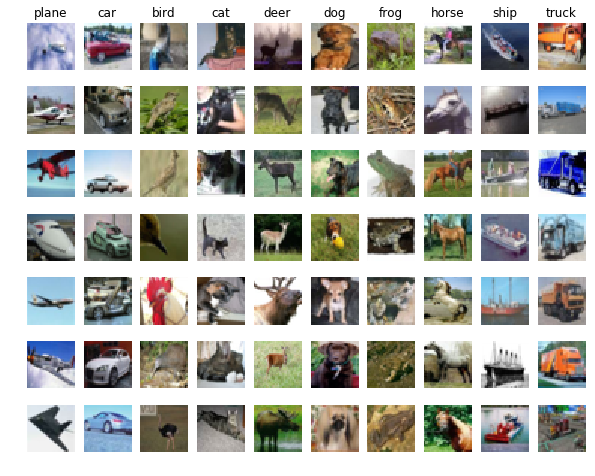

In [7]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## My CNN

In [9]:
growth_k = 24
nb_block = 2
init_learning_rate = 1e-4
epsilon = 1e-4
dropout_rate = 0.2
nesterov_momentum = 0.9
weight_decay = 1e-4
batch_size = 64
iteration = 782
total_epochs = 100


class DenseNet():
    def __init__(self, x, nb_blocks, filters, training):
        self.nb_blocks = nb_blocks
        self.filters = filters
        self.training = training
        self.model = self.create_model(x)

    def conv_layer(self, input, filter, kernel, stride=1, layer_name="conv"):

        with tf.name_scope(layer_name):
            network = tf.layers.conv2d(inputs=input, use_bias=False,
                                       filters=filter, kernel_size=kernel,
                                       strides=stride, padding='SAME')
            return network

    def global_average_pooling(self, x, stride=1):
        pool_size = [np.shape(x)[1], np.shape(x)[2]]
        return tf.layers.average_pooling2d(inputs=x, pool_size=pool_size,
                                           strides=stride)  # The stride value does not matter

    def batch_normalization(self, x, training, scope):
        with arg_scope([batch_norm],
                       scope=scope,
                       updates_collections=None,
                       decay=0.9,
                       center=True,
                       scale=True,
                       zero_debias_moving_mean=True):
            return tf.cond(training,
                           lambda: batch_norm(inputs=x, is_training=training,
                                              reuse=None),
                           lambda: batch_norm(inputs=x, is_training=training,
                                              reuse=True))

    def bottleneck_layer(self, x, scope):
        with tf.name_scope(scope):
            x = self.batch_normalization(x, training=self.training,
                                    scope=scope + '_batch1')
            x = tf.nn.relu(x)
            x = self.conv_layer(x, filter=4 * self.filters, kernel=[1, 1],
                           layer_name=scope + '_conv1')
            x = tf.layers.dropout(inputs=x, rate=dropout_rate,
                                  training=self.training)

            x = self.batch_normalization(x, training=self.training,
                                    scope=scope + '_batch2')
            x = tf.nn.relu(x)
            x = self.conv_layer(x, filter=self.filters, kernel=[3, 3],
                           layer_name=scope + '_conv2')
            x = tf.layers.dropout(inputs=x, rate=dropout_rate,
                                  training=self.training)

            return x

    def transition_layer(self, x, scope):
        with tf.name_scope(scope):
            x = self.batch_normalization(x, training=self.training,
                                    scope=scope + '_batch1')
            x = tf.nn.relu(x)
            x = self.conv_layer(x, filter=self.filters, kernel=[1, 1],
                           layer_name=scope + '_conv1')
            x = tf.layers.dropout(inputs=x, rate=dropout_rate,
                                  training=self.training)
            x = tf.layers.average_pooling2d(inputs=x, pool_size=[2, 2],
                                            strides=2, padding='VALID')

            return x

    def dense_block(self, input_x, nb_layers, layer_name):
        with tf.name_scope(layer_name):
            layers_concat = list()
            layers_concat.append(input_x)

            x = self.bottleneck_layer(input_x,
                                      scope=layer_name + '_bottleN_' + str(0))

            layers_concat.append(x)

            for i in range(nb_layers - 1):
                x = tf.concat(layers_concat, axis=3)
                x = self.bottleneck_layer(x,
                                          scope=layer_name + '_bottleN_' + str(
                                              i + 1))
                layers_concat.append(x)

            x = tf.concat(layers_concat, axis=3)
            return x

    def create_model(self, input_x):
        x = self.conv_layer(input_x, filter=2 * self.filters, kernel=[7, 7],
                       stride=2, layer_name='conv0')
        x = self.dense_block(input_x=x, nb_layers=6, layer_name='dense_1')
        x = self.transition_layer(x, scope='trans_1')
        x = self.dense_block(input_x=x, nb_layers=12, layer_name='dense_2')
        x = self.transition_layer(x, scope='trans_2')
        x = self.dense_block(input_x=x, nb_layers=48, layer_name='dense_3')
        x = self.transition_layer(x, scope='trans_3')
        x = self.dense_block(input_x=x, nb_layers=32, layer_name='dense_final')
        x = self.batch_normalization(x, training=self.training,
                                scope='linear_batch')
        x = tf.nn.relu(x)
        x = self.global_average_pooling(x)
        x = flatten(x)
        x = tf.layers.dense(inputs=x, units=10, name='linear')
        return x

### Augmentation

In [10]:
def _random_crop(batch, crop_shape, padding=None):
    oshape = np.shape(batch[0])

    if padding:
        oshape = (oshape[0] + 2 * padding, oshape[1] + 2 * padding)
    new_batch = []
    npad = ((padding, padding), (padding, padding), (0, 0))
    for i in range(len(batch)):
        new_batch.append(batch[i])
        if padding:
            new_batch[i] = np.lib.pad(batch[i], pad_width=npad,
                                      mode='constant', constant_values=0)
        nh = random.randint(0, oshape[0] - crop_shape[0])
        nw = random.randint(0, oshape[1] - crop_shape[1])
        new_batch[i] = new_batch[i][nh:nh + crop_shape[0],
                       nw:nw + crop_shape[1]]
    return new_batch


def _random_flip_leftright(batch):
    for i in range(len(batch)):
        if bool(random.getrandbits(1)):
            batch[i] = np.fliplr(batch[i])
    return batch


def color_preprocessing(x_train, x_val, x_test):
    x_train = x_train.astype('float32')
    x_val = x_val.astype('float32')
    x_test = x_test.astype('float32')
    x_train[:, :, :, 0] = (x_train[:, :, :, 0] - np.mean(x_train[:, :, :, 0])) / np.std(x_train[:, :, :, 0])
    x_train[:, :, :, 1] = (x_train[:, :, :, 1] - np.mean(x_train[:, :, :, 1])) / np.std(x_train[:, :, :, 1])
    x_train[:, :, :, 2] = (x_train[:, :, :, 2] - np.mean(x_train[:, :, :, 2])) / np.std(x_train[:, :, :, 2])
    
    x_val[:, :, :, 0] = (x_val[:, :, :, 0] - np.mean(x_val[:, :, :, 0])) / np.std(x_val[:, :, :, 0])
    x_val[:, :, :, 1] = (x_val[:, :, :, 1] - np.mean(x_val[:, :, :, 1])) / np.std(x_val[:, :, :, 1])
    x_val[:, :, :, 2] = (x_val[:, :, :, 2] - np.mean(x_val[:, :, :, 2])) / np.std(x_val[:, :, :, 2])

    x_test[:, :, :, 0] = (x_test[:, :, :, 0] - np.mean(x_test[:, :, :, 0])) / np.std(x_test[:, :, :, 0])
    x_test[:, :, :, 1] = (x_test[:, :, :, 1] - np.mean(x_test[:, :, :, 1])) / np.std(x_test[:, :, :, 1])
    x_test[:, :, :, 2] = (x_test[:, :, :, 2] - np.mean(x_test[:, :, :, 2])) / np.std(x_test[:, :, :, 2])

    return x_train, x_val, x_test


def data_augmentation(batch):
    batch = _random_flip_leftright(batch)
    batch = _random_crop(batch, [32, 32], 4)
    return batch

### Utils

In [11]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield np.transpose(inputs[excerpt], axes=(0, 2, 3, 1)), targets[excerpt]

## Run

In [13]:
def test_fn(test_x, test_y):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        test_iteration = 10
        test_acc = 0.0
        test_loss = 0.0
        test_pre_index = 0
        add = 1000

        for it in range(test_iteration):
            test_batch_x = test_x[test_pre_index: test_pre_index + add]
            test_batch_y = test_y[test_pre_index: test_pre_index + add]
            test_pre_index = test_pre_index + add

            test_feed_dict = {
                x: test_batch_x,
                label: test_batch_y,
                learning_rate: epoch_learning_rate,
                training_flag: False
            }

            loss_, acc_ = sess.run([cost, accuracy], feed_dict=test_feed_dict)

            test_loss += loss_ / 10.0
            test_acc += acc_ / 10.0

        return test_acc, test_loss

In [14]:
num_epochs = 10 
batch_size = 64

x = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])
label = tf.placeholder(tf.float32, shape=[None, 10])
training_flag = tf.placeholder(tf.bool)
learning_rate = tf.placeholder(tf.float32, name='learning_rate')
logits = DenseNet(x=x, nb_blocks=nb_block, filters=growth_k, training=training_flag).model
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=label, logits=logits))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, epsilon=epsilon)
train = optimizer.minimize(cost)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(label, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

X_train_color_prep, X_val_color_prep, X_test_color_prep = color_preprocessing(X_train, X_val, X_test)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [15]:
epoch_train_loss = []
epoch_train_accuracy = []
epoch_val_loss = []
epoch_val_accuracy = []

In [2]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epoch_learning_rate = init_learning_rate
    
    for epoch in range(1, total_epochs + 1):
        start_time = time.time()
        if epoch == (total_epochs * 0.5) or epoch == (total_epochs * 0.75):
            epoch_learning_rate = epoch_learning_rate / 10

        train_batches = 0
        train_acc = 0.0
        train_loss = 0.0

        for step in range(iteration):
            batch_x, batch_y = next(iterate_minibatches(X_train_color_prep, y_train, 
                                                        batch_size))
            batch_x = data_augmentation(batch_x)

            train_feed_dict = {
                x: batch_x,
                label: batch_y,
                learning_rate: epoch_learning_rate,
                training_flag : True
            }

            _, batch_loss = sess.run([train, cost], feed_dict=train_feed_dict)
            batch_acc = accuracy.eval(feed_dict=train_feed_dict)

            train_loss += batch_loss
            train_acc += batch_acc
            train_batches += batch_size

            if step == iteration - 1:
                train_loss /= iteration
                train_acc /= iteration
                
        
                
        epoch_train_loss.append(train_loss)
        epoch_train_accuracy.append(train_acc)
                
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, num_epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))

Epoch 1 of 100 took 375.037s
  train loss:		2.528379
  train accuracy:		9.37 %
Epoch 2 of 100 took 324.684s
  train loss:		2.298970
  train accuracy:		10.80 %
Epoch 3 of 100 took 324.680s
  train loss:		2.288369
  train accuracy:		11.50 %
Epoch 4 of 100 took 326.671s
  train loss:		2.269575
  train accuracy:		12.56 %
Epoch 5 of 100 took 328.752s
  train loss:		2.233882
  train accuracy:		13.32 %
Epoch 6 of 100 took 322.785s
  train loss:		2.179392
  train accuracy:		14.01 %
Epoch 7 of 100 took 327.744s
  train loss:		2.066865
  train accuracy:		15.34 %
Epoch 8 of 100 took 329.758s
  train loss:		1.836965
  train accuracy:		17.51 %
Epoch 9 of 100 took 321.794s
  train loss:		1.698435
  train accuracy:		19.87 %
Epoch 10 of 100 took 322.780s
  train loss:		1.597078
  train accuracy:		22.14 %
Epoch 11 of 100 took 323.855s
  train loss:		1.512368
  train accuracy:		326.27 %
Epoch 12 of 100 took 326.859s
  train loss:		1.440759
  train accuracy:		26.27 %
Epoch 13 of 100 took 324.819s
  train

## test

In [5]:
test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    _, acc = test_fn(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print("Achievement unlocked: mage 80 lvl")
else:
    print("Feed more!")


Final results:
  test accuracy:		93.67 %
Achievement unlocked: mage 80 lvl


### Hi, my name is `Куприянов Артем`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that

которая называется DenseNet. Ссылка на оригинальную статью: https://arxiv.org/abs/1608.06993

Отличие моей сети от статейной только в том, что я использую слой `global_average_pooling`, а они `global_max_pooling`

##### One day, with no signs of warning,

Почему именно денснет? Я погуглил, кто лучше всего на цифаре справляется с задачей. Из сетей с хорошим скором и мне более ли менее знакомых как раз-таки и был DenseNet

##### Finally, after __  iterations, __ mugs of [tea/coffee]

Я взял архитектуру, которую я писал на работе и подогнал ее под код этого ноутбука.
Вобщем, ничего сложного.

До этого применил стандартную аугментацию с рандомными поворотами и кропами. Также понижал градиент при достижении некоторой эпохи
